In [1]:
import requests
import json
import cv2
from matplotlib.pyplot import imread,imshow,show
import numpy as np

In [2]:
images = ['/home/daniyal/Desktop/Rekognition_Comparison/Face_Detection_Sample/group_photo.jpeg',
            '/home/daniyal/Desktop/Rekognition_Comparison/Face_Detection_Sample/group_photo1.jpeg',
            ]
url =  "http://127.0.0.1:8000/api/image/" 



In [3]:
def draw_bbox_landm(img, x1, y1, x2, y2):
        """draw bboxes and landmarks"""
#         print(x1,y1,x2,y2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 0), 2)
        imshow(img)
        

Retina Net


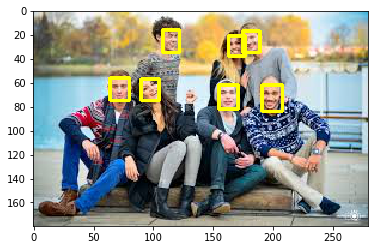

MTCNN


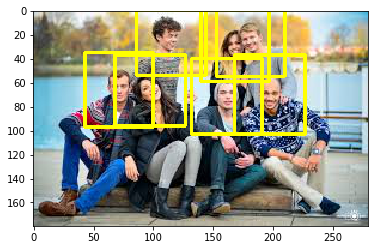

Retina Net


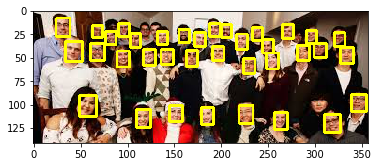

MTCNN


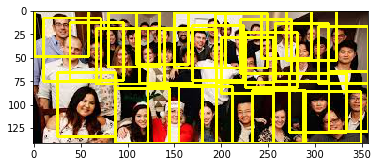

In [4]:
for imagePath in images:
    files = {'file': open(imagePath, 'rb') }
    response = requests.post(url, files=files)
        
    res=json.loads(response.text)

    retina_net = res['RetinaNet']
    mtcnn = res["Faces"]
    
    print("Retina Net")
    img=imread(imagePath)
    for i,_ in enumerate(retina_net):
        draw_bbox_landm(img,int(np.ceil(retina_net[i]["Bounding Boxes"]['x1'])),int(np.ceil(retina_net[i]["Bounding Boxes"]['y1'])),int(np.ceil(retina_net[i]["Bounding Boxes"]['x2'])),int(np.ceil(retina_net[i]["Bounding Boxes"]['y2'])))
    show()
    
    print("MTCNN")
    img=imread(imagePath)
    for i,_ in enumerate(mtcnn):
        draw_bbox_landm(img,int(np.ceil(mtcnn[i]["Bounding Boxes"]['left'])),int(np.ceil(mtcnn[i]["Bounding Boxes"]['top'])),int(np.ceil(mtcnn[i]["Bounding Boxes"]['right'])),int(np.ceil(mtcnn[i]["Bounding Boxes"]['bottom'])))
    show()